In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset CIC Train50

In [2]:
import pickle

In [3]:
with open('df_cic_train50_no_preprocessing_getdummies', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (990755, 80)
X teste =  (424610, 80)
y multiclasse treino =  (990755,)
y multiclasse teste =  (424610,)
y binário treino =  (990755,)
y binário teste =  (424610,)


In [5]:
y_train50_binary_train.value_counts()

0    795290
1    195465
Name: Label_binary, dtype: int64

In [6]:
y_train50_multiclass_train.value_counts()

BENIGN          795290
DoS              88338
PortScan         55615
DDoS             45176
BruteForce        4863
WebAttack          741
BotNet             718
Infiltration        11
Heartbleed           3
Name: Label_multiclass, dtype: int64

In [7]:
y_train50_binary_test.value_counts()

0    341258
1     83352
Name: Label_binary, dtype: int64

In [8]:
y_train50_multiclass_test.value_counts()

BENIGN          341258
DoS              37992
PortScan         23849
DDoS             18837
BruteForce        2054
WebAttack          348
BotNet             264
Infiltration         6
Heartbleed           2
Name: Label_multiclass, dtype: int64

In [9]:
X_train50_train.head()

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Destination_Port_Reserved,Destination_Port_User,Destination_Port_Private
1008718,100866871,10,8,1179,11595,385,0,117.900000,184.335112,5792,...,0.000000e+00,14016,14016,99300000.0,0.000000,99300000,99300000,1,0,0
1092907,119173647,578,1386,26428,2583295,1678,0,45.723183,237.512016,4388,...,9.433356e+05,1406375,72297,58831928.0,64000.234765,58877183,58786673,1,0,0
1034897,92349580,13,15,8531,7140,2645,0,656.230769,1136.872109,1460,...,1.502804e+06,2211812,86526,44982377.5,29559.184774,45003279,44961476,1,0,0
727692,99860659,9,6,310,11595,310,0,34.444444,103.333333,5792,...,0.000000e+00,2179,2179,99800000.0,0.000000,99800000,99800000,1,0,0
1200733,8035787,5,0,30,0,6,6,6.000000,0.000000,0,...,0.000000e+00,2002,2002,8033785.0,0.000000,8033785,8033785,1,0,0


In [10]:
print(y_train50_multiclass_train.unique())
print(y_train50_binary_train.unique())

['DoS' 'BENIGN' 'DDoS' 'PortScan' 'BruteForce' 'BotNet' 'WebAttack'
 'Infiltration' 'Heartbleed']
[1 0]


In [11]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [12]:
X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [13]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset CIC Test50

In [14]:
import pickle

In [15]:
with open('df_cic_test50_no_preprocessing_getdummies', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [16]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1415365, 80)
y multiclasse =  (1415365,)
y binário =  (1415365,)


In [17]:
y_test50_multiclass.value_counts()

BENIGN          1136548
DoS              126330
PortScan          79464
DDoS              64013
BruteForce         6917
WebAttack          1089
BotNet              982
Infiltration         17
Heartbleed            5
Name: Label_multiclass, dtype: int64

In [18]:
y_test50_binary.value_counts()

0    1136548
1     278817
Name: Label_binary, dtype: int64

In [19]:
X_test50.head()

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Destination_Port_Reserved,Destination_Port_User,Destination_Port_Private
0,117058676,23,30,844,27963,211,0,36.695652,66.387591,1904,...,118057.13400,403607,236649,5.810000e+07,1.865256e+05,58200000,58000000,1,0,0
1,3,2,0,12,0,6,6,6.000000,0.000000,0,...,0.00000,0,0,0.000000e+00,0.000000e+00,0,0,0,0,1
2,116201868,36,38,2485,39550,517,0,69.027778,150.122328,2897,...,66192.94888,252298,21996,9.641058e+06,1.317185e+06,10000000,5458526,1,0,0
3,7382149,8,6,56,11607,20,0,7.000000,5.656854,5840,...,0.00000,51900,51900,6.097168e+06,0.000000e+00,6097168,6097168,1,0,0
4,30795,1,1,77,159,77,77,77.000000,0.000000,159,...,0.00000,0,0,0.000000e+00,0.000000e+00,0,0,1,0,0


In [20]:
print(y_test50_multiclass.unique())
print(y_test50_binary.unique())

['BENIGN' 'DDoS' 'PortScan' 'DoS' 'BruteForce' 'BotNet' 'WebAttack'
 'Infiltration' 'Heartbleed']
[0 1]


In [21]:
#X_test50.shape

In [22]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

In [23]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [24]:
X_test50 = X_test50.to_numpy()
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [25]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Algoritmo LightBGM para Train e Validation - Train50

In [26]:
import lightgbm as lgb

### Predição train50 binária

In [27]:
lgb_train50_binary = lgb.LGBMClassifier(objective='binary', n_estimators=100, max_depth=8, random_state=42)

In [28]:
lgb_train50_binary.fit(X_train50_train, y_train50_binary_train)

LGBMClassifier(max_depth=8, objective='binary', random_state=42)

In [29]:
predict_train50_binary = lgb_train50_binary.predict(X_train50_test)

In [30]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.999507783613198

### Visualização da árvore binária

In [33]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [34]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [35]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

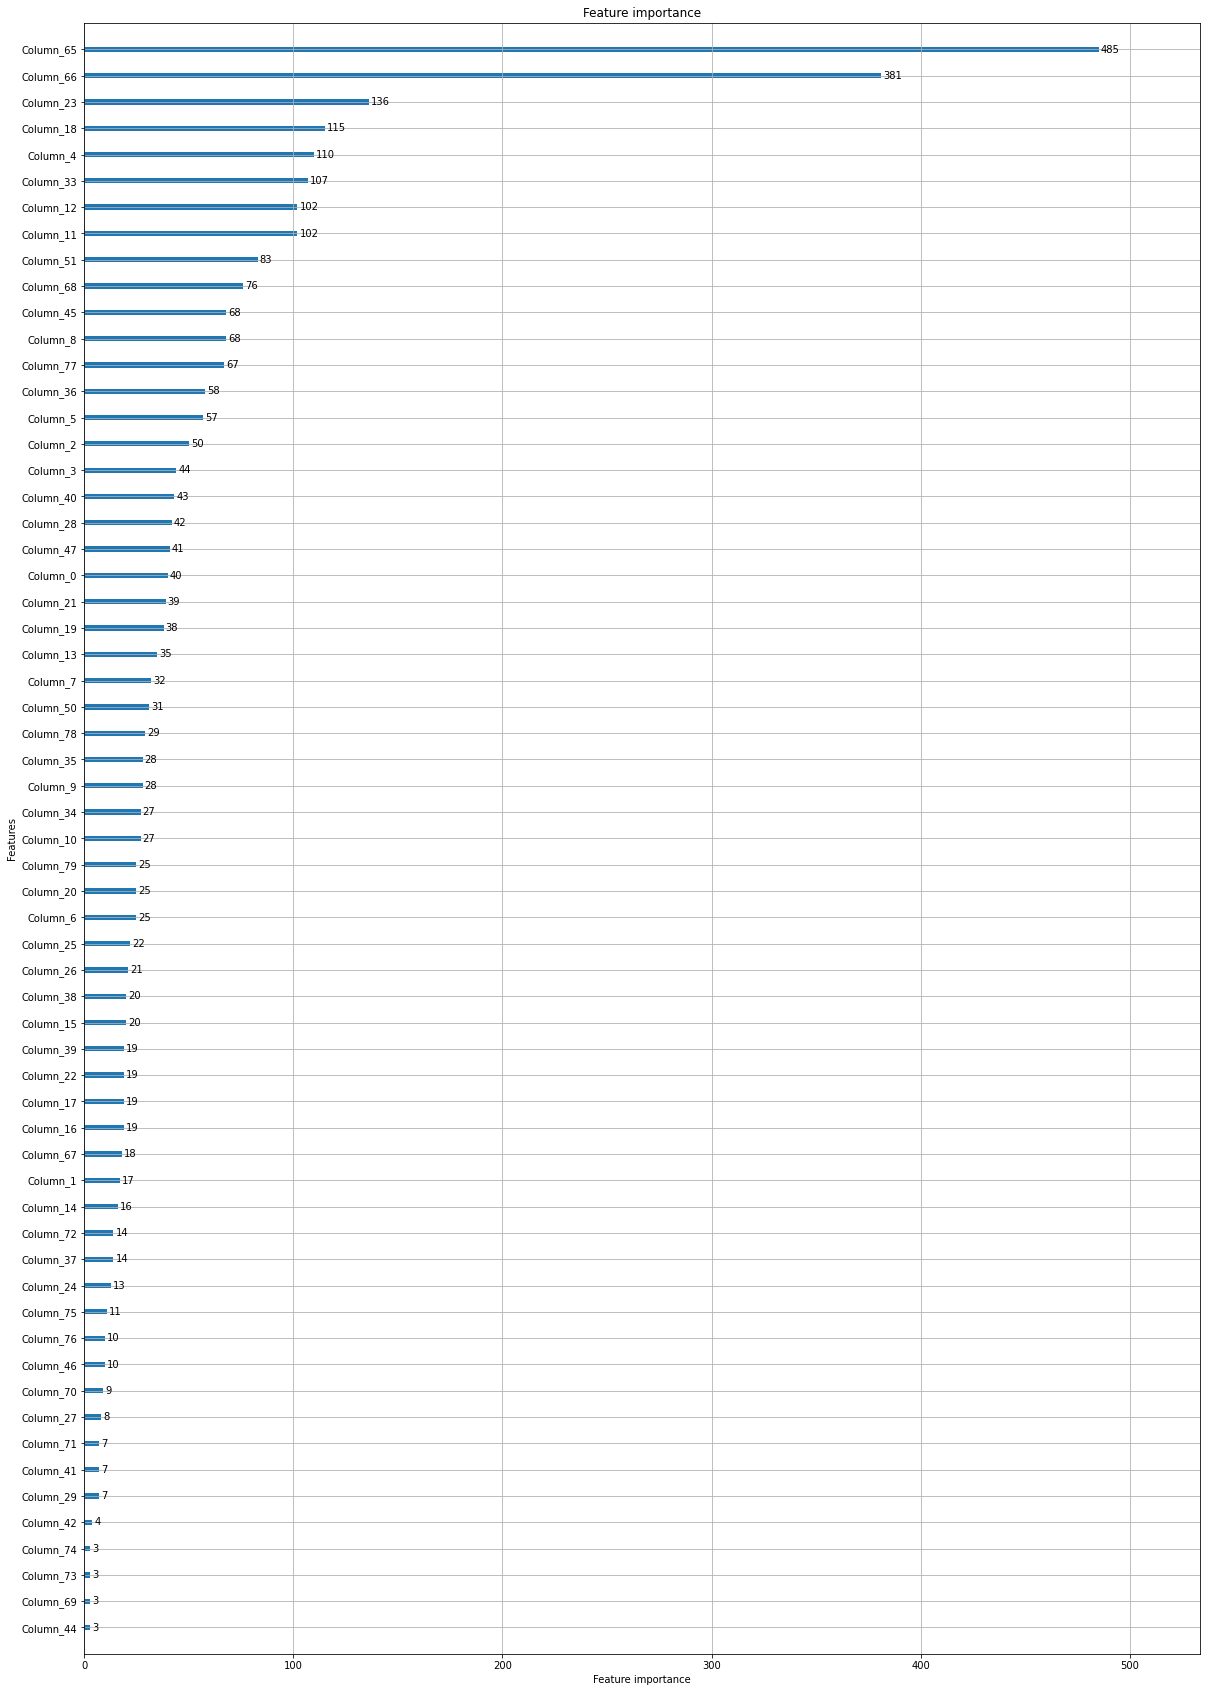

In [36]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [37]:
lgb_train50_multiclass = lgb.LGBMClassifier(objective='multiclass', n_estimators=100, max_depth=8, random_state=42)

In [38]:
lgb_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

LGBMClassifier(max_depth=8, objective='multiclass', random_state=42)

In [39]:
predict_train50_multiclass = lgb_train50_multiclass.predict(X_train50_test)

In [40]:
predict_train50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [41]:
y_train50_multiclass_test

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [42]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9809283813381692

### Visualização da árvore multiclasse

In [43]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [44]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

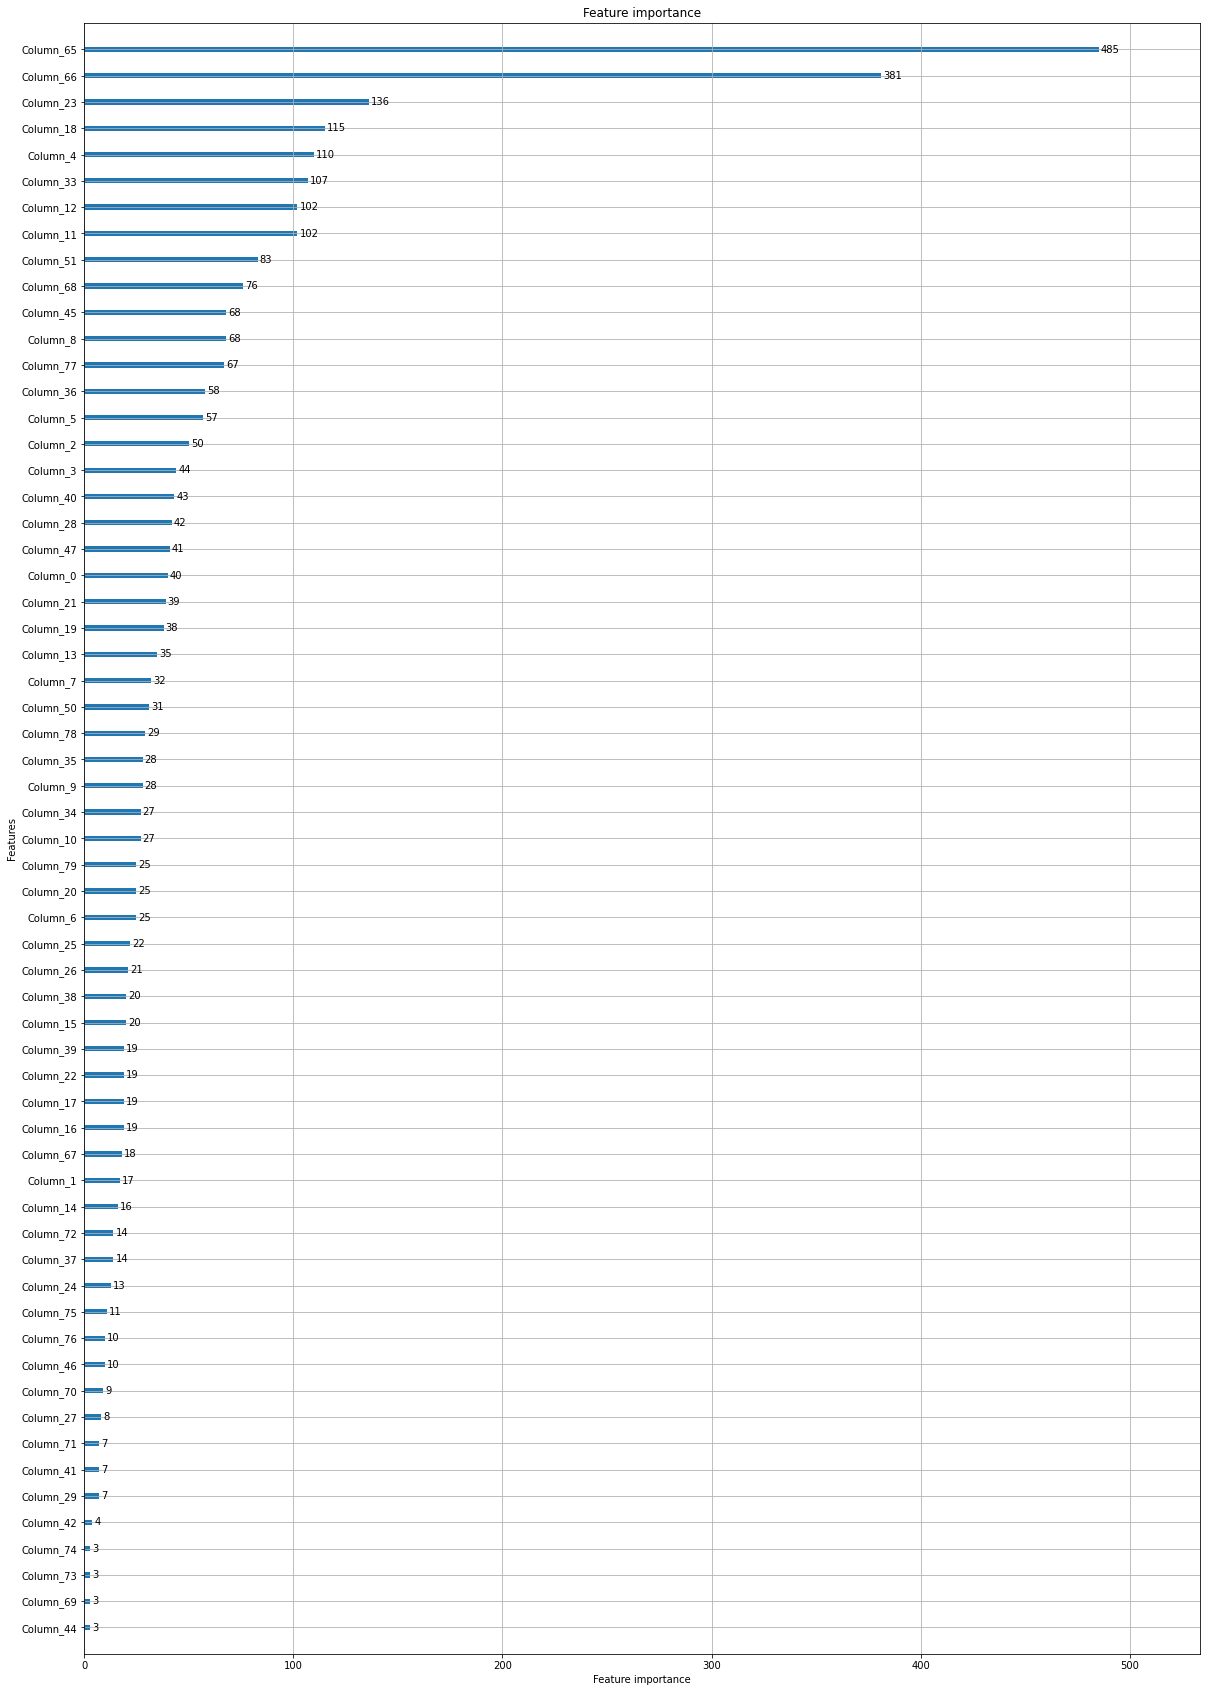

In [45]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

In [46]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [47]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999777  0.999610  0.999694    341258
           1   0.998405  0.999088  0.998747     83352

    accuracy                       0.999508    424610
   macro avg   0.999091  0.999349  0.999220    424610
weighted avg   0.999508  0.999508  0.999508    424610



In [48]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.988442  0.988654  0.988548    341258
      BotNet   0.070796  0.030303  0.042440       264
  BruteForce   0.693747  0.685979  0.689841      2054
        DDoS   0.978008  0.986834  0.982401     18837
         DoS   0.943249  0.937092  0.940161     37992
  Heartbleed   0.000000  0.000000  0.000000         2
Infiltration   0.000000  0.000000  0.000000         6
    PortScan   0.984570  0.984570  0.984570     23849
   WebAttack   0.124161  0.106322  0.114551       348

    accuracy                       0.980928    424610
   macro avg   0.531442  0.524417  0.526946    424610
weighted avg   0.980995  0.980928  0.980954    424610



### Cross Validation do train50

In [49]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(lgb_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [50]:
score_cv_train50_binary

array([0.99946506, 0.99962655, 0.99961646, 0.99950543, 0.9997073 ,
       0.99944487, 0.99961645, 0.9995458 , 0.99949533, 0.99948524])

In [51]:
cv_result_train50_binary

[0.9995508474178267]

In [52]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(lgb_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [53]:
score_cv_train50_multiclass

array([0.82342848, 0.98941217, 0.87952683, 0.866234  , 0.91600388,
       0.95007822, 0.88019177, 0.98644461, 0.93298007, 0.94302296])

In [54]:
cv_result_train50_multiclass

[0.916732299161894]

### Matriz de Confusão do train50

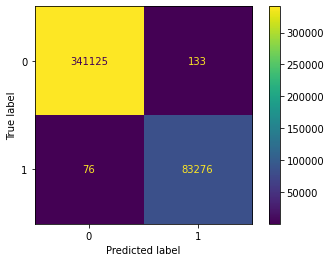

In [55]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

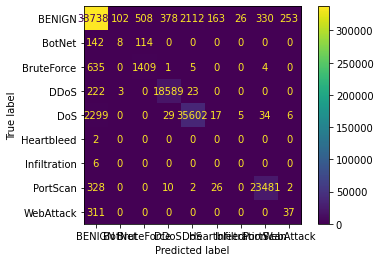

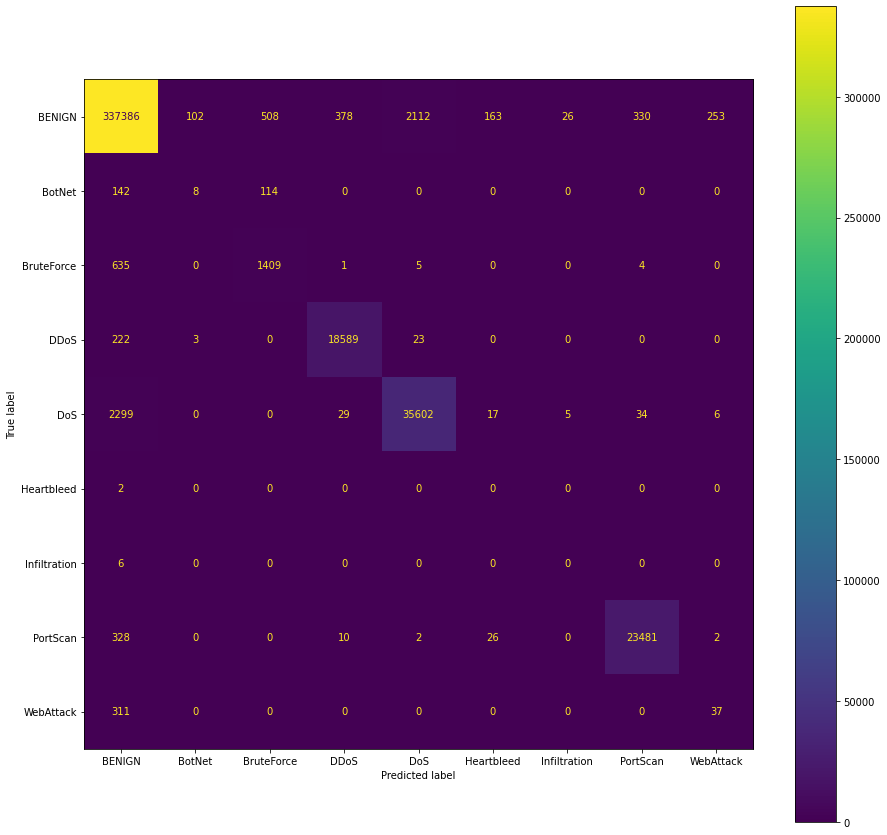

In [56]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)

# Algoritmo LightBGM para Test50

### Predição Test50 binária

In [57]:
predict_test50_binary = lgb_train50_binary.predict(X_test50)

In [58]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9995916247752347

### Predição test50 multiclasse

In [61]:
predict_test50_multiclass = lgb_train50_multiclass.predict(X_test50)

In [62]:
predict_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [63]:
y_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [64]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9811193579041448

### Precision e Recall do test50

In [65]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999829  0.999662  0.999746   1136548
           1   0.998624  0.999304  0.998964    278817

    accuracy                       0.999592   1415365
   macro avg   0.999226  0.999483  0.999355   1415365
weighted avg   0.999592  0.999592  0.999592   1415365



In [66]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.988614  0.988770  0.988692   1136548
      BotNet   0.113960  0.040733  0.060015       982
  BruteForce   0.685986  0.687870  0.686927      6917
        DDoS   0.977934  0.986596  0.982246     64013
         DoS   0.943318  0.938494  0.940900    126330
  Heartbleed   0.000000  0.000000  0.000000         5
Infiltration   0.000000  0.000000  0.000000        17
    PortScan   0.985677  0.984647  0.985162     79464
   WebAttack   0.107561  0.092746  0.099606      1089

    accuracy                       0.981119   1415365
   macro avg   0.533672  0.524429  0.527061   1415365
weighted avg   0.981144  0.981119  0.981118   1415365



### Matriz de Confusão do test50

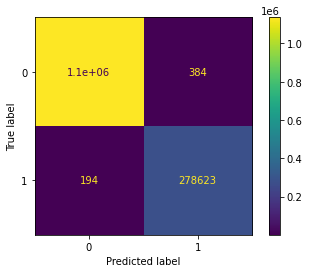

In [67]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_test50, y_test50_binary)
plt.show()

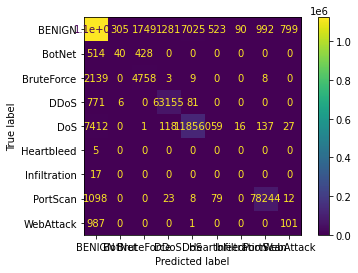

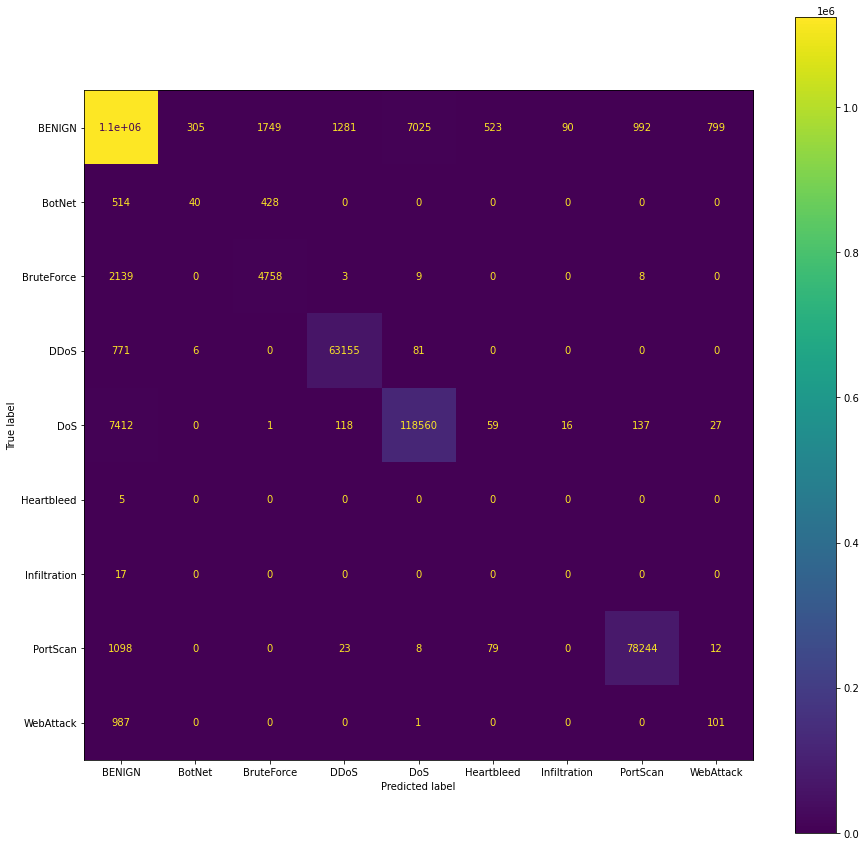

In [68]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)